In [73]:
#from google.colab import drive
#drive.mount('/content/drive')

In [74]:
!pip install textparser

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [75]:
#!cp -R /content/drive/My\ Drive/CSE253 ./CSE253

In [76]:
%matplotlib inline

import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300
plt.ion()   # interactive mode

In [77]:
import textparser
from textparser import Sequence, Optional, choice, Not, Any, NoMatch, ZeroOrMore, Repeated, Forward
from pprint import pprint
import tokenize
import sys


class Parser(textparser.Parser):
  def token_specs(self):
      return [
          ('SKIP',                r'[ \r\n\t]+'),
          ('NUMBER',              r'-?\d+(\.\d+)?([eE][+-]?\d+)?'),
          ('STRING',              r'\w+(\s*\w+)?'),
          ('COMMA',          ',', r','),
          ('COLON',          ':', r':'),
          ('TRUE',                r'true'),
          ('FALSE',               r'false'),
          ('NULL',                r'null'),
          ('LPAREN',         '(', r'\('),
          ('RPAREN',         ')', r'\)'),
          ('LBRACKET',       '[', r'\['),
          ('RBRACKET',       ']', r'\]'),
          ('LBRACE',         '{', r'\{'),
          ('RBRACE',         '}', r'\}'),
          ('MISMATCH',            r'.')
      ]

  def grammar(self):
      value = Forward()
      info  = Sequence('STRING', ':', 'NUMBER', 'STRING', ':', 'NUMBER', 'STRING', ':', 'NUMBER')
      tup_  = Sequence('STRING', ':', choice(info, 'NUMBER'))
      value <<= choice(tup_,
                        'STRING',
                        'NUMBER',
                        'TRUE',
                        'FALSE',
                        'NULL')

      return value

def transform(token):
  if isinstance(token, list):
    if isinstance(token[2], list):
        tokens = [token[2][i:i+3] for i in range(0, len(token[2]), 3)]
        return [transform(token[0]), {transform(elem[0]): transform(elem[2]) for elem in tokens}]
    elif isinstance(token[0], textparser.Token):
        return [transform(token[0]), transform(token[2])]
    else:
        return {}
  elif token.kind == 'ESCAPED_STRING':
      return token.value[1:-1]
  elif token.kind == 'NUMBER':
      return float(token.value)
  elif token.kind == 'TRUE':
      return True
  elif token.kind == 'FALSE':
      return False
  elif token.kind == 'STRING':
      return token.value
  else:
      return None


In [78]:
filepath="C:\\Users\\origa\\OneDrive\\Documents\\_HW\\CSE 253\\CSE-253-PA3\\dice\\model_output_02_14_21_53.txt"
results = {
    'Training Check': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Validation Results': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Test Results': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Best Loss': {'Loss': []}
    }

with open(filepath) as fp:
  line = fp.readline()
  while line:
    tok_str = ' '.join(line.strip().replace('\t', ' ').split())
    tree = None
    try:
      tree = Parser().parse(tok_str, token_tree=True)
      ttree = transform(tree)
    except Exception: True
    if tree:
      if ttree[0] == 'Best Loss':
        results[ttree[0]]['Loss'].append(ttree[1])
      else:
        results[ttree[0]]['Loss'].append(ttree[1]['Loss'])
        results[ttree[0]]['Accuracy'].append(ttree[1]['Accuracy'])
        results[ttree[0]]['IoU'].append(ttree[1]['IoU'])
    line = fp.readline()
print(results)

{'Training Check': {'Loss': [0.552598, 0.534756, 0.521738, 0.509571, 0.503662, 0.495267, 0.500486, 0.497836, 0.496512, 0.495149, 0.488941, 0.490331, 0.488935, 0.507346, 0.486895, 0.485156, 0.491699, 0.489031, 0.489556, 0.492685, 0.485124, 0.488932, 0.484823, 0.491229, 0.48387, 0.487797, 0.489323, 0.493643, 0.490311, 0.49137, 0.481957, 0.490526, 0.489119, 0.492143, 0.496067, 0.49352, 0.499344], 'Accuracy': [45.269569, 46.695322, 47.999979, 49.150516, 49.707656, 50.549552, 50.005296, 50.253634, 50.379552, 50.511062, 51.130632, 50.988633, 51.123393, 49.28666, 51.330276, 51.49872, 50.842653, 51.107752, 51.054259, 50.740847, 51.496686, 51.115318, 51.52579, 50.885166, 51.620585, 51.227396, 51.07477, 50.641724, 50.975594, 50.868734, 51.85098, 51.008214, 51.165957, 50.874872, 50.496638, 50.764188, 50.192552], 'IoU': [0.151049, 0.154987, 0.160708, 0.166059, 0.173636, 0.177345, 0.173361, 0.17511, 0.1758, 0.178179, 0.180468, 0.179628, 0.179964, 0.170338, 0.180132, 0.181829, 0.18077, 0.181967, 0.1

37
37


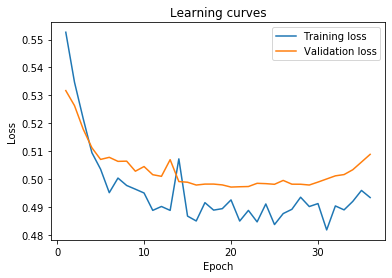

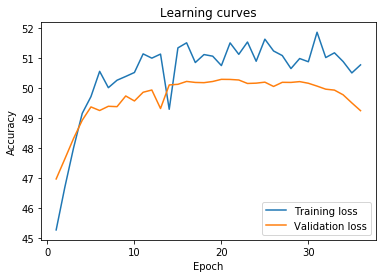

In [79]:
def print_plot(results, eval_type, name="Learning Curve"):
  num_epochs = min(len(results['Training Check'][eval_type]), len(results['Validation Results'][eval_type]) - 1)
  epochs = range(1, num_epochs+1)
  print(len(results['Training Check'][eval_type]))
  plt.figure()
  plt.plot(epochs, results['Training Check'][eval_type][:num_epochs], label='Training loss')
  plt.plot(epochs, results['Validation Results'][eval_type][1:num_epochs+1], label='Validation loss')
  plt.legend()
  plt.title('Learning curves')
  plt.xlabel('Epoch')
  plt.ylabel(eval_type)
  plt.xticks([i for i in range(0, len(epochs), 10)])
  #plt.show()
  plt.savefig('figures/dice_'+eval_type, bbox_inches='tight')

print_plot(results, 'Loss')
print_plot(results, 'Accuracy')

In [80]:
visualize_model(results['Training Check'])

plt.ioff()
plt.show()

NameError: name 'visualize_model' is not defined